<a href="https://colab.research.google.com/github/srkpriyanka95/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/srkpriyanka95/Bike-Sharing-Demand-Prediction-.git



# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import *
import warnings 
warnings.filterwarnings('ignore')

ImportError: ignored

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
BikeShare_data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Bike sharing demand prediction/SeoulBikeData.csv',encoding='unicode escape')

### Dataset First View

In [ ]:
# Dataset First Look
BikeShare_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
BikeShare_data.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
BikeShare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
BikeShare_data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
BikeShare_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

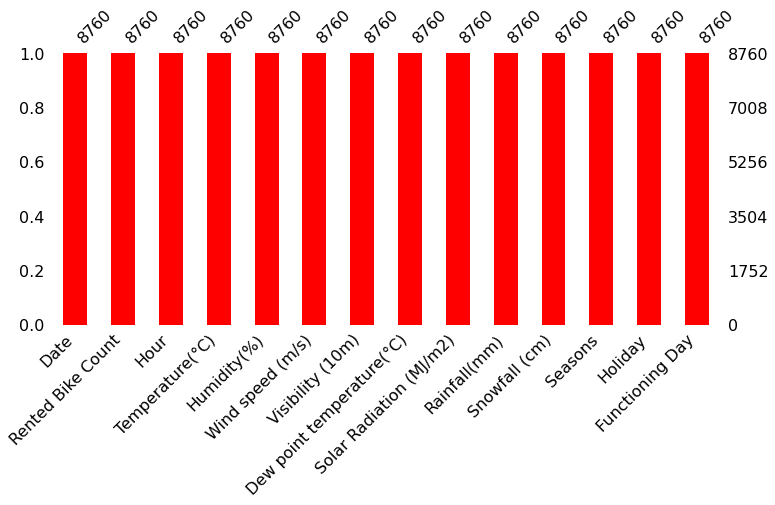

In [ ]:
# Visualizing the missing values
msno.bar(BikeShare_data,figsize=(12,5),color='Red')

### What did you know about your dataset?

*   There are 8760 observations and 14 features in the dataset

*   There are no duplicates found.
*   There are no missing values in the dataset.
*   The dataset contains three different datatypes, namely 
      



>>>>>
*   object 
*   int 
*    float
















## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Renamming columns
BikeShare_data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity', 'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Functioning Day':'functioning_day'},inplace=True)
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'Seasons', 'Holiday', 'functioning_day'],
      dtype='object')

In [ ]:
# Dataset Describe
BikeShare_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description 



1.   List item
2.   List item



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in BikeShare_data.columns:
    print('\n The number of unique values in' , i ,' : ', BikeShare_data[i].nunique())



 The number of unique values in Date  :  365

 The number of unique values in Rented Bike Count  :  2166

 The number of unique values in Hour  :  24

 The number of unique values in Temperature  :  546

 The number of unique values in Humidity  :  90

 The number of unique values in wind_speed  :  65

 The number of unique values in visibility  :  1789

 The number of unique values in dew_point_temperature  :  556

 The number of unique values in solar_radiation  :  345

 The number of unique values in rainfall  :  61

 The number of unique values in snowfall  :  51

 The number of unique values in Seasons  :  4

 The number of unique values in Holiday  :  2

 The number of unique values in functioning_day  :  2


In [ ]:
# unique values in categorical variables

categorical_variables = list(set(BikeShare_data.columns)-set(BikeShare_data.describe().columns))
print(f'Categorical Variables are {categorical_variables}')
for i in categorical_variables:
  print(f'\n Unique values in {i} are {BikeShare_data[i].unique()}' )


Categorical Variables are ['Holiday', 'Date', 'Seasons', 'functioning_day']

 Unique values in Holiday are ['No Holiday' 'Holiday']

 Unique values in Date are ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting the date column into date time datatype
BikeShare_data['Date']=pd.to_datetime(BikeShare_data['Date'],format='%d/%m/%Y')
# Seperating the month, year and day column for futher analysis
BikeShare_data['month']=BikeShare_data['Date'].dt.month
BikeShare_data['year']=BikeShare_data['Date'].dt.year
BikeShare_data['day']=BikeShare_data['Date'].dt.day_name()
# Creating Weekend column using day name column
BikeShare_data['weekend']=BikeShare_data['day'].apply(lambda  x: 'yes' if (x== 'Saturday' or x== 'Sunday') else 'no')

In [ ]:
BikeShare_data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Seasons,Holiday,functioning_day,month,year,day,weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no


In [ ]:
# Converting the Date, Month and Year columns into object datatype, as they are categorical variables
BikeShare_data['month']=BikeShare_data['month'].astype('object')
BikeShare_data['year']=BikeShare_data['year'].astype('object')
BikeShare_data['Hour']=BikeShare_data['Hour'].astype('object')
# Checking whether the datatypes are changed are not
BikeShare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   object        
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  fun

In [ ]:
# Knowing the start and end date of data
print(f"Data starts from {BikeShare_data.Date.min().strftime('%d-%m-%Y')} to {BikeShare_data.Date.max().strftime('%d-%m-%Y')}")

Data starts from 01-12-2017 to 30-11-2018


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1  Count of bikes rented over different hours of the day**

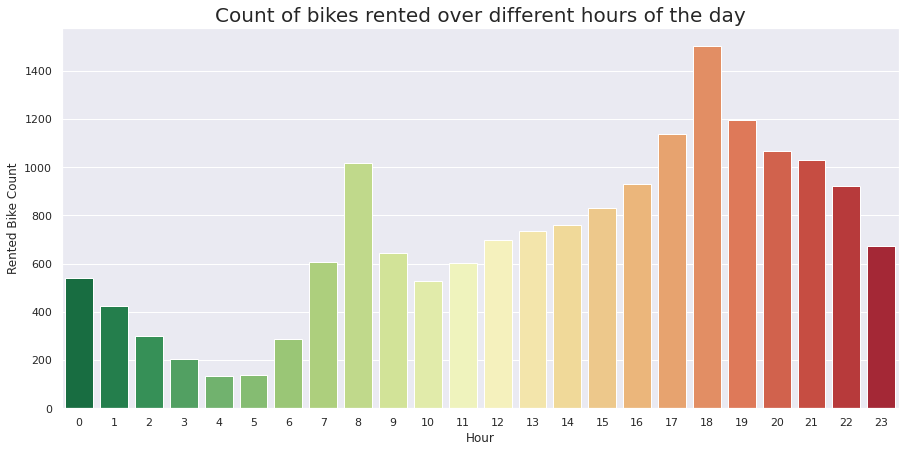

In [ ]:
# Chart - 1 visualizating the count of bikes rented over different hours of the day
sns.set(rc={"figure.figsize":(15, 7)})
rented_vs_hour=sns.barplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',palette='RdYlGn_r',ci=None)
rented_vs_hour.set_title('Count of bikes rented over different hours of the day',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart -  Bike Rental over different hours in different seasons**

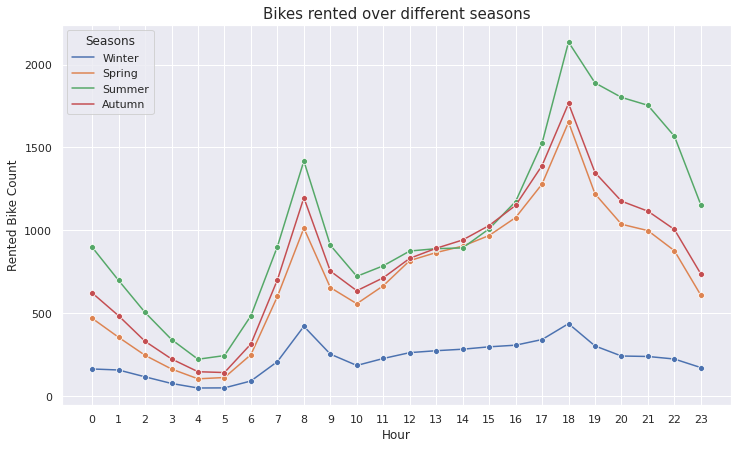

In [ ]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(12, 7)})
rentedHour_vs_seasons=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='Seasons',ci=None,marker='o')
rentedHour_vs_seasons.set_title('Bikes rented over different seasons',fontsize=15)
rentedHour_vs_seasons.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 2 Bike Rental over different seasons**

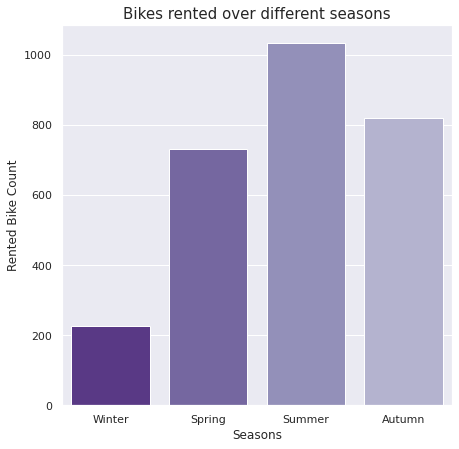

In [ ]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(7, 7)})
sns.set_palette('Purples_r')
rented_vs_seasons=sns.barplot(data=BikeShare_data,x='Seasons',y='Rented Bike Count',ci=None)
rented_vs_seasons.set_title('Bikes rented over different seasons',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - Bike Rentals over different Months**

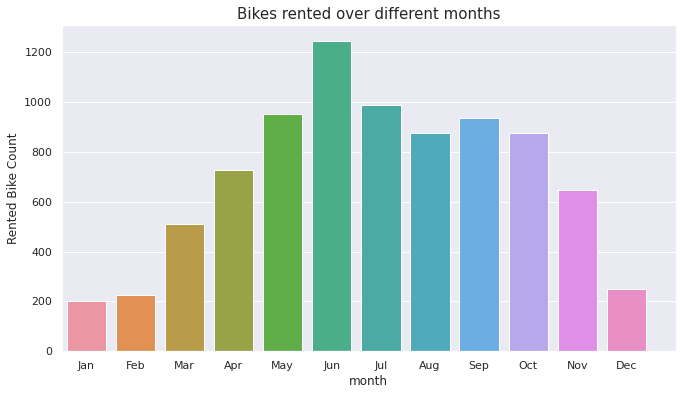

In [ ]:
# Chart - 2 Visualization for bikes rented over different seasons
sns.set(rc={"figure.figsize":(11, 6)})
rented_vs_months=sns.barplot(data=BikeShare_data,x='month',y='Rented Bike Count',ci=None)
rented_vs_months.set_title('Bikes rented over different months',fontsize=15)
rented_vs_months.set_xticks(range(13))
rented_vs_months.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 3 Bikes rented over weekend or weekday**

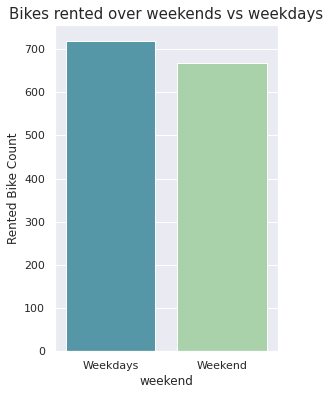

In [ ]:
# Chart - 3 Bikes rented over weekend or weekday
sns.set(rc={"figure.figsize":(4, 6)})
sns.set_palette('Spectral_r')
BikeShare_data.weekend.replace({'yes':'Weekend','no':'Weekdays'})
rented_vs_days=sns.barplot(data=BikeShare_data.replace({'yes':'Weekend','no':'Weekdays'}),x='weekend',y='Rented Bike Count',ci=None)
rented_vs_days.set_title('Bikes rented over weekends vs weekdays',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 4 Bike rentals hours in weekends**

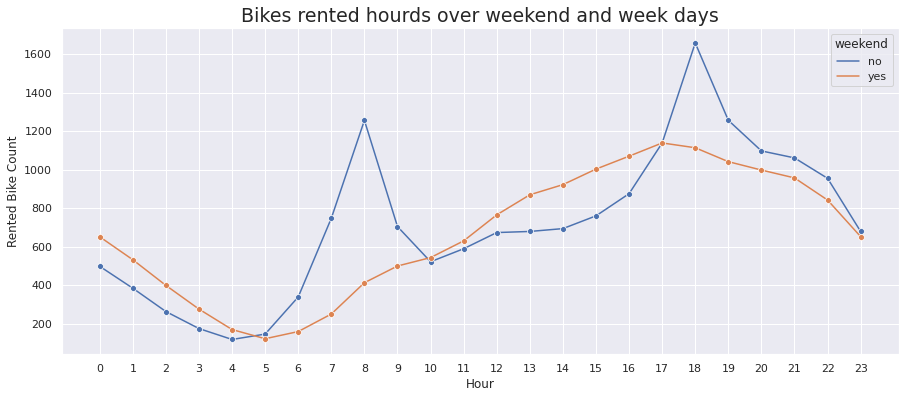

In [ ]:
# Chart - 4 Bike rentals hours in weekends
sns.set(rc={"figure.figsize":(15, 6)})
rented_weekend=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='weekend',marker='o',ci=None)
rented_weekend.set_title('Bikes rented hourds over weekend and week days',fontsize=19)
rented_weekend.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 5 Bike rentals over holidays vs Non-Holidays**

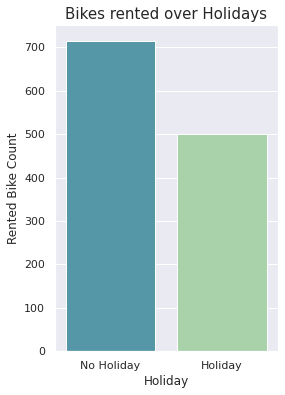

In [ ]:
# Chart - 5 Bike rentals over holidays vs Non-Holidays
sns.set(rc={"figure.figsize":(4, 6)})
sns.set_palette('Spectral_r')
rented_vs_days=sns.barplot(data=BikeShare_data,x='Holiday',y='Rented Bike Count',ci=None)
rented_vs_days.set_title('Bikes rented over Holidays',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 6 Bikes rented over different hours during holidays**

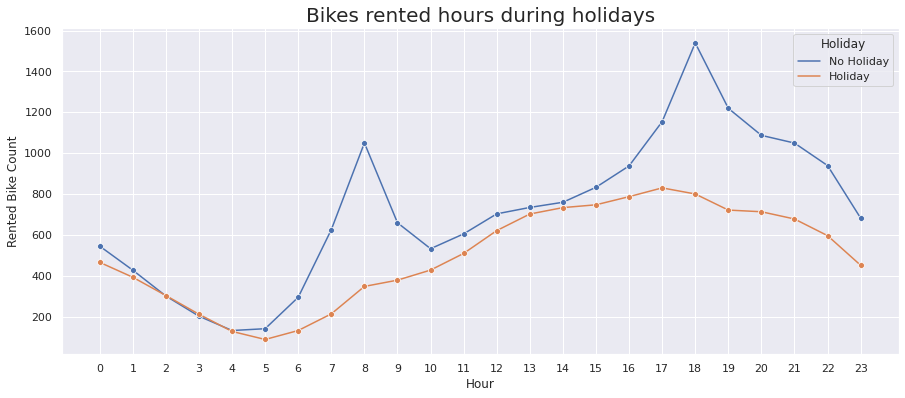

In [ ]:
# Chart - 6 visualization of Bikes rented over different hours during holidays
sns.set(rc={"figure.figsize":(15, 6)})
rented_vs_months=sns.lineplot(data=BikeShare_data,x='Hour',y='Rented Bike Count',hue='Holiday',marker='o',ci=None)
rented_vs_months.set_title('Bikes rented hours during holidays',fontsize=20)
rented_vs_months.set_xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 7  Distribution plot for Numerical Variables**

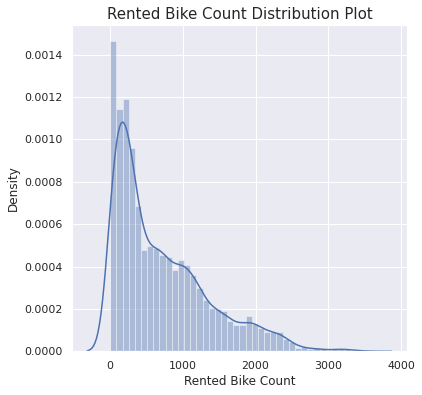

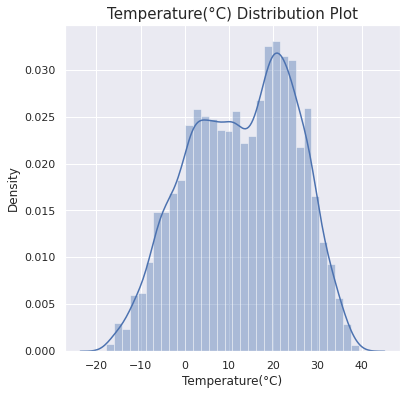

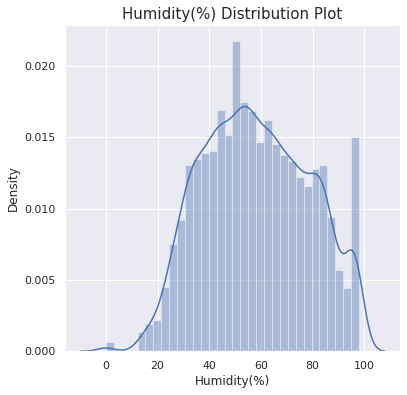

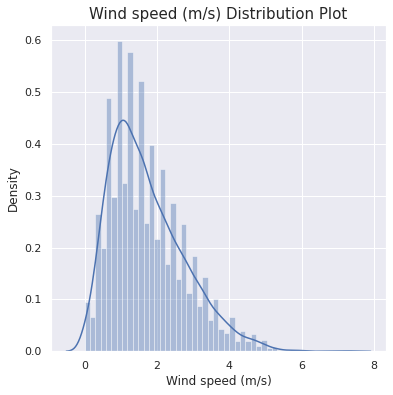

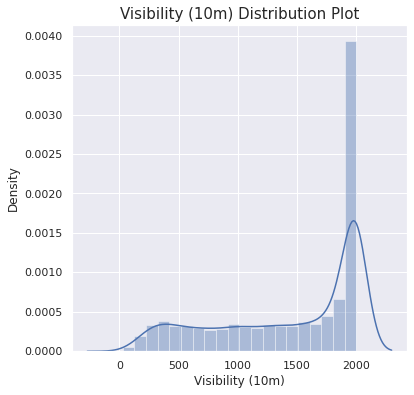

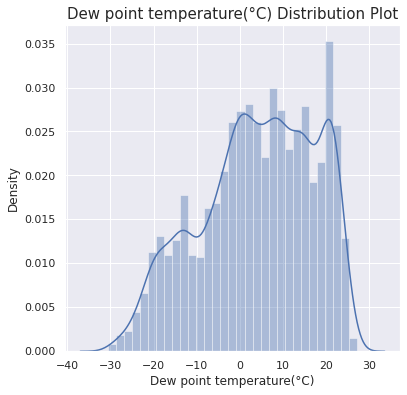

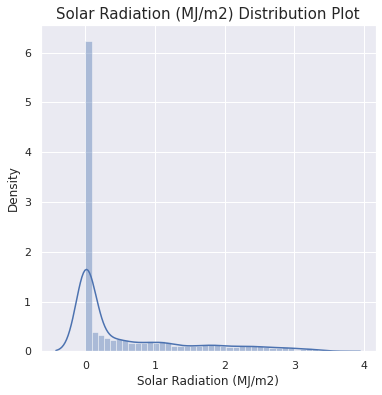

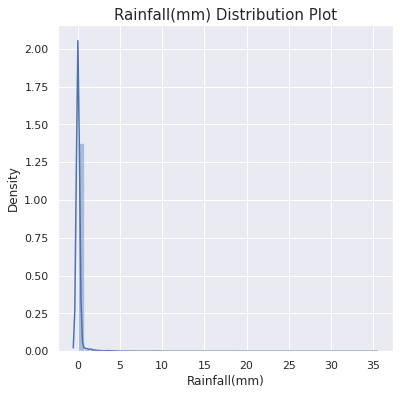

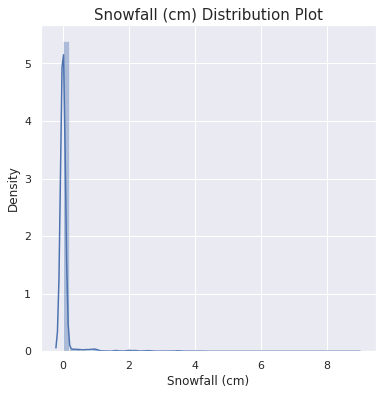

In [ ]:
# Chart - 7 Distribution of different variables in the dataframe
sns.set(rc={"figure.figsize":(6, 6)})
for i in BikeShare_data.describe().columns:
  dist=sns.distplot(BikeShare_data[i])
  dist.set_title(i+' Distribution Plot',fontsize=15)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 11 numerical variables vs the dependent varibale**

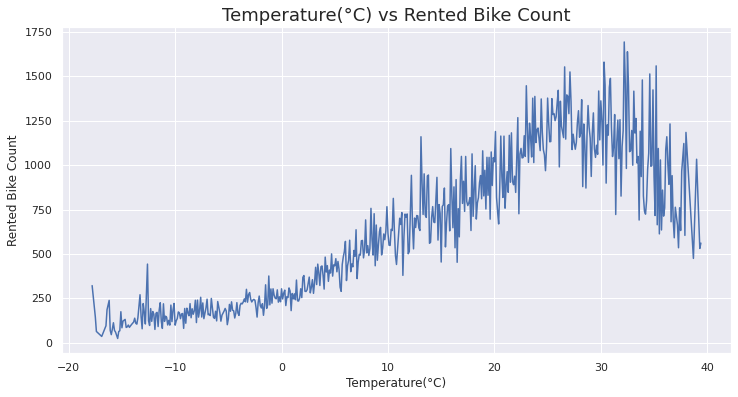

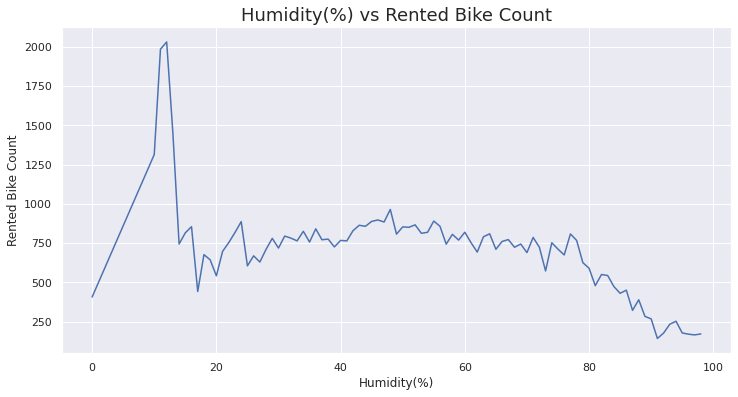

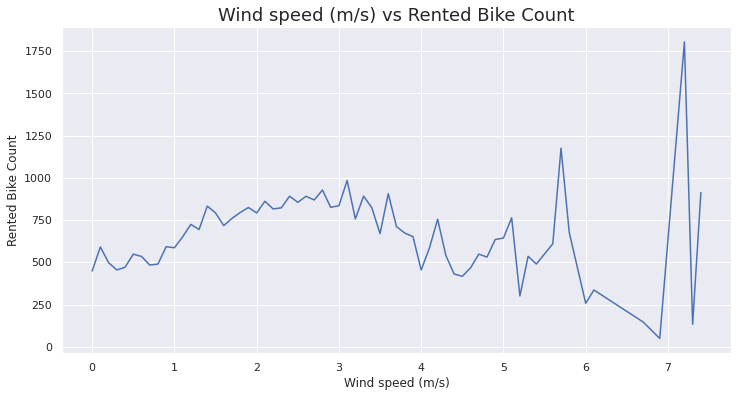

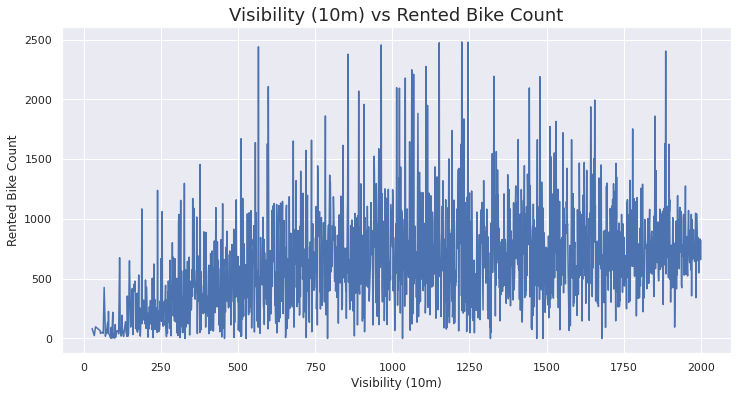

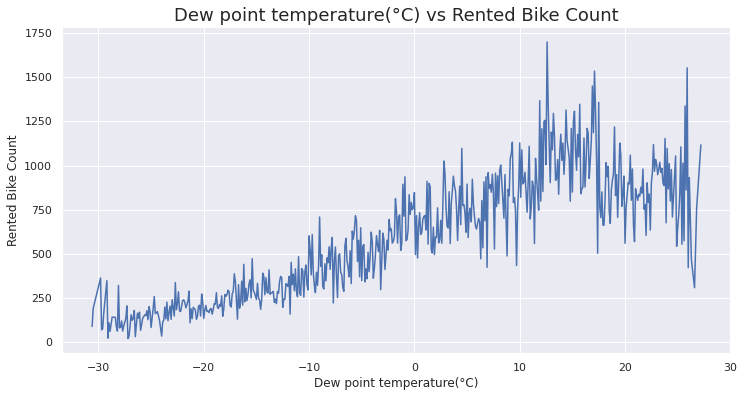

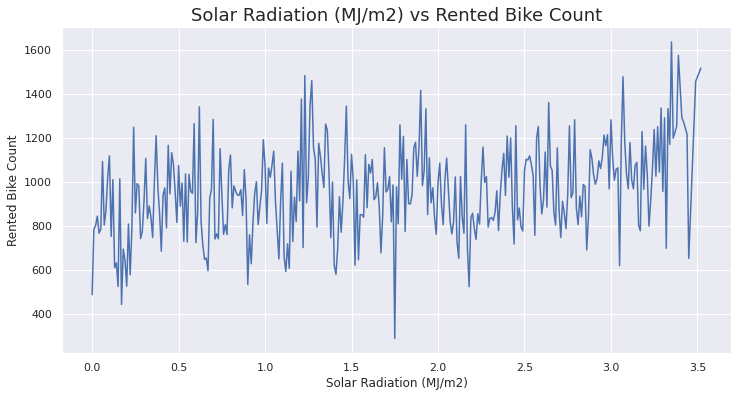

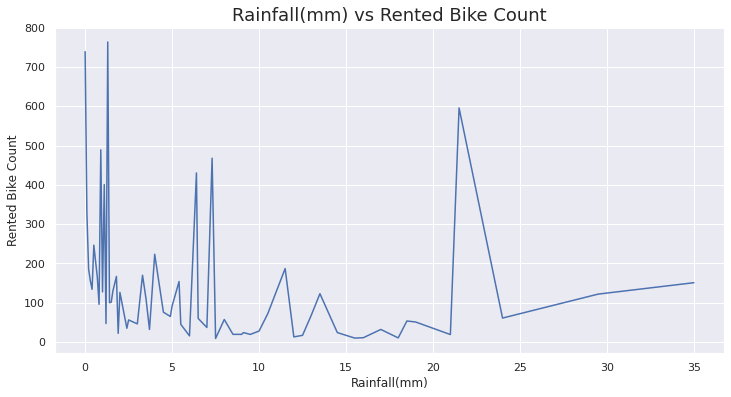

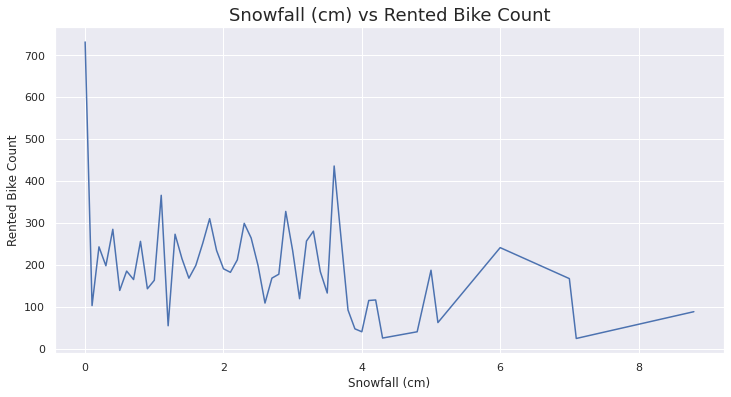

In [ ]:
# Chart - 11 visualization the numerical variables vs the dependent varibale
line_data=list(BikeShare_data.describe().columns)
line_data.remove('Rented Bike Count')
sns.set(rc={"figure.figsize":(12,6)})
for i in line_data:
  sns.lineplot(data=BikeShare_data,x=i,y='Rented Bike Count',ci=None)
  plt.title( i + ' vs Rented Bike Count',fontsize=18)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 8 Regression plot for Numerical Variable**

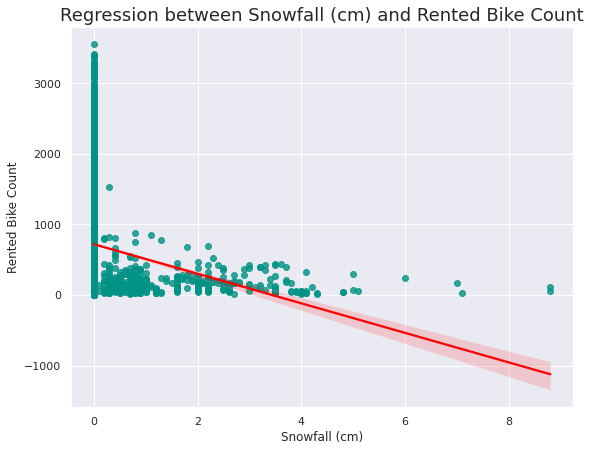

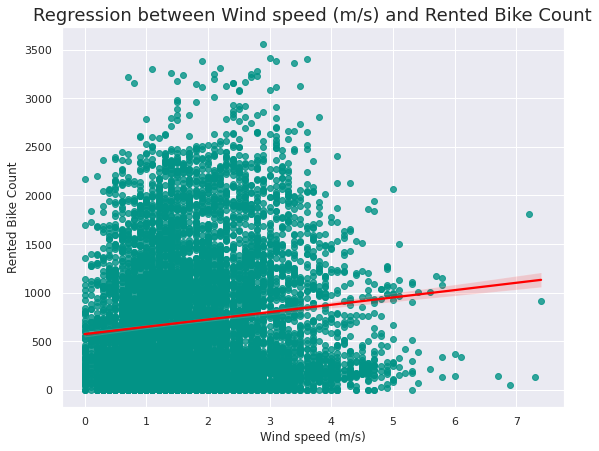

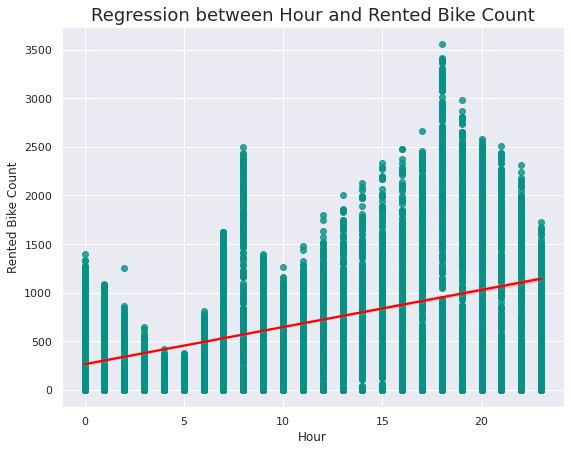

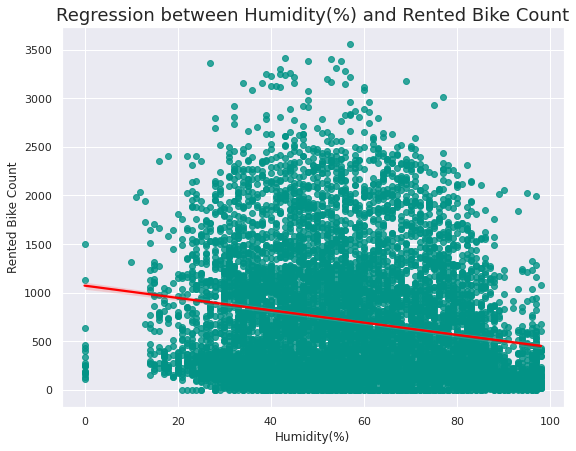

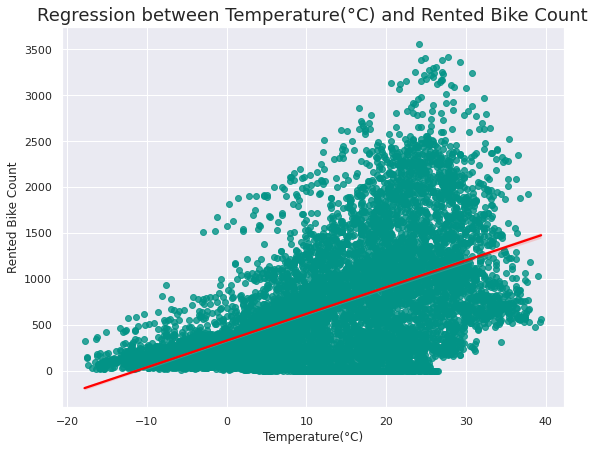

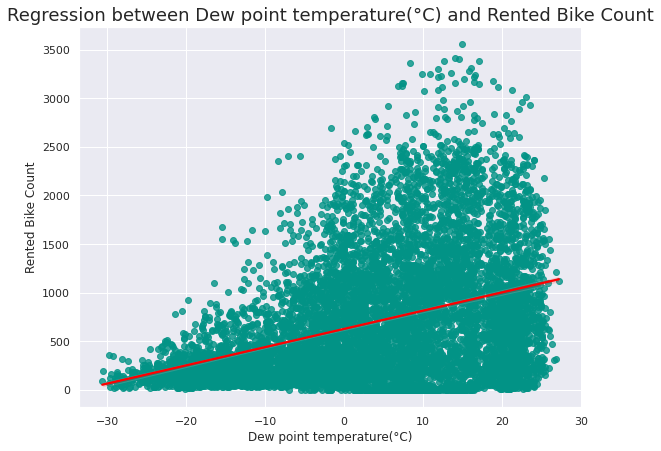

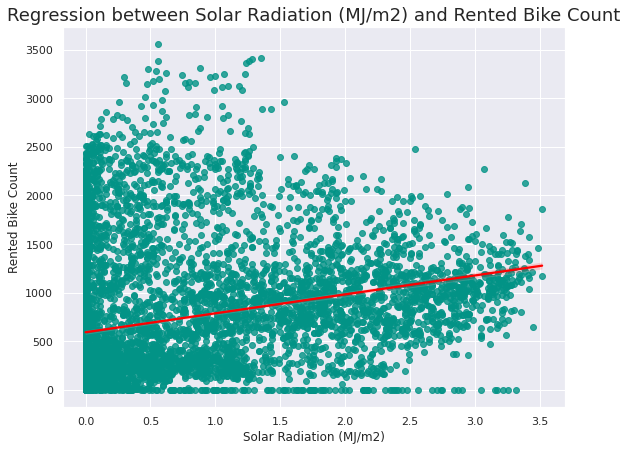

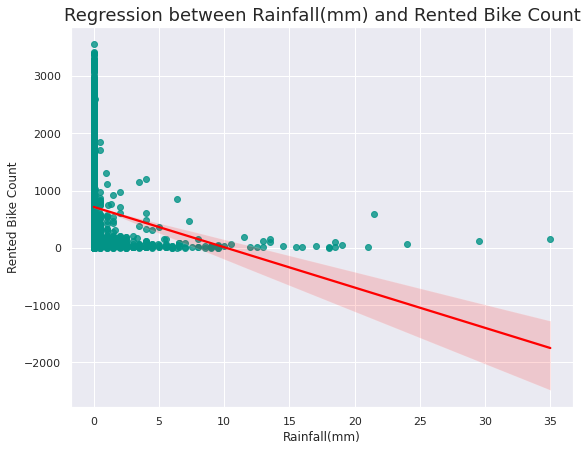

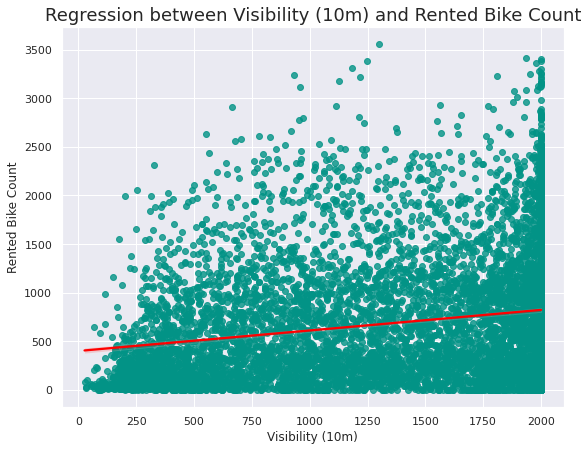

In [ ]:
# Chart - 8 visualization code
sns.set(rc={"figure.figsize":(9,7)})
BikeShare_data['Hour']=BikeShare_data['Hour'].astype('int')
reg_variables=list((set(BikeShare_data.describe().columns)-{'Rented Bike Count'}))
for i in reg_variables:
  sns.regplot(x=BikeShare_data[i],y=BikeShare_data['Rented Bike Count'],scatter_kws={'color':'#029386'},line_kws={'color':'red'})
  plt.title('Regression between '+i+' and Rented Bike Count',fontsize=18)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 9 Correlation**

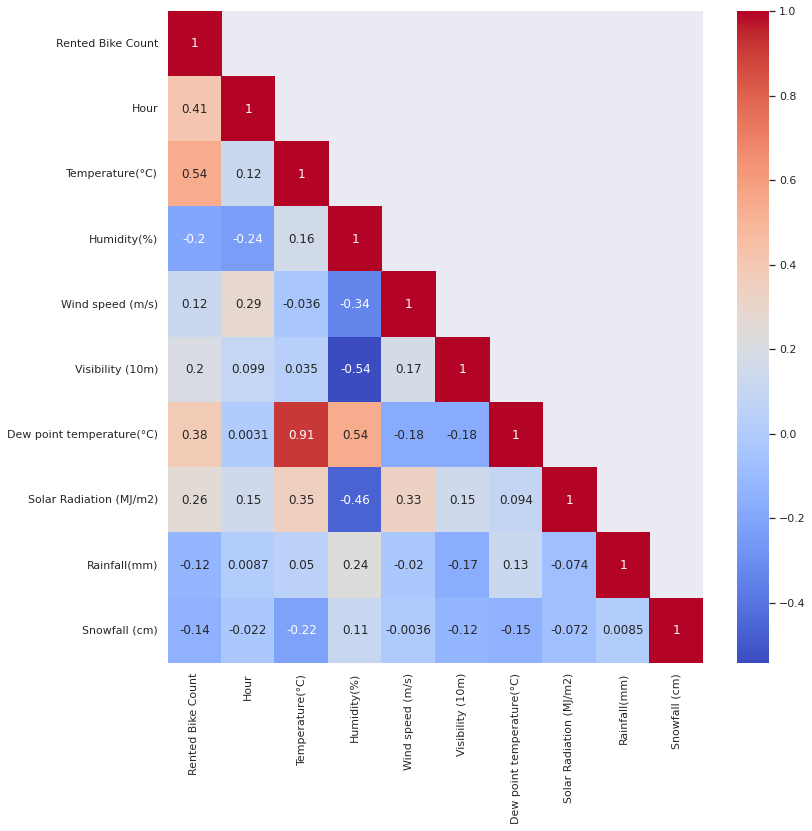

In [ ]:
# Chart - 9 Correlation between variables
sns.set(rc={"figure.figsize":(12,12)})
corr=np.array(BikeShare_data.corr())
corr[np.tril_indices_from(corr)]=False
sns.heatmap(BikeShare_data.corr(),annot=True,mask=corr,cmap='coolwarm')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 12 **

In [ ]:
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'year', 'day', 'weekend'],
      dtype='object')

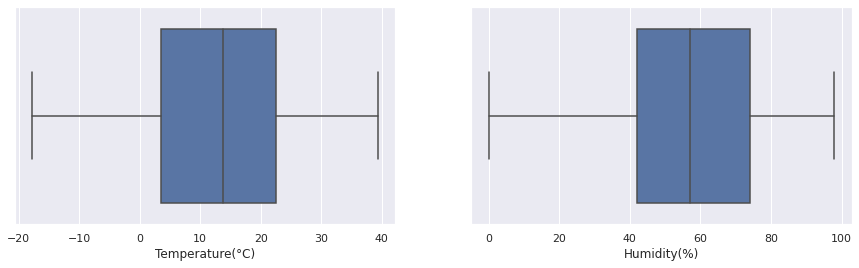

In [ ]:
# Chart - 12 visualization code
sns.set(rc={"figure.figsize":(15,4)})
fig, ax =plt.subplots(1,2)
sns.boxplot(BikeShare_data['Temperature(°C)'],ax=ax[0])
sns.boxplot(BikeShare_data['Humidity(%)'],ax=ax[1])
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 13 Functional Day vs Bike Rental count**

In [ ]:
BikeShare_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

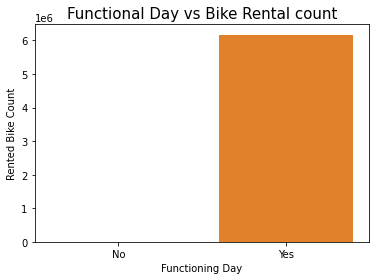

In [ ]:
# Chart - 13 visualization code
FuncVsrental=BikeShare_data.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index()
sns.barplot(data=FuncVsrental,x='Functioning Day',y='Rented Bike Count')
plt.title('Functional Day vs Bike Rental count',fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# grouping functional day
functional=BikeShare_data.groupby(['functioning_day']).agg({'Rented Bike Count':'sum'}).reset_index()
functional

,functioning_day,Rented Bike Count
0,No,0
1,Yes,6172314


In [ ]:
#creating a copy of data
bike_df=BikeShare_data.copy()
bike_df = bike_df.query('functioning_day == "Yes"')

In [ ]:
# Encode your categorical columns
bike_df.drop(columns=['Date','functioning_day'],inplace=True)
bike_df[['Seasons','Holiday','month','year','day','weekend']]=bike_df[['Seasons','Holiday','month','year','day','weekend']].apply(LabelEncoder().fit_transform)
bike_en=bike_df.apply(LabelEncoder().fit_transform)


In [ ]:
BikeShare_data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Seasons,Holiday,functioning_day,month,year,day,weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,Friday,no


In [ ]:
bike_en.head()

,Rented Bike Count,Hour,Temperature,Humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Seasons,Holiday,month,year,day,weekend
0,252,0,111,28,22,1779,114,0,0,0,3,1,11,0,0,0
1,202,1,108,29,8,1779,114,0,0,0,3,1,11,0,0,0
2,171,2,103,30,10,1779,113,0,0,0,3,1,11,0,0,0
3,105,3,101,31,9,1779,114,0,0,0,3,1,11,0,0,0
4,76,4,103,27,23,1779,104,0,0,0,3,1,11,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

,features,vif
0,day,3.277285
1,Hour,4.364904
2,dew_point_temperature,712.849130
3,wind_speed,4.857565
4,solar_radiation,2.869266
5,snowfall,1.175746
6,rainfall,1.192311
7,Humidity,105.803407
8,Temperature,533.956193
9,year,29.237938


In [ ]:
bike_en.drop(columns=['dew_point_temperature'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

,features,vif
0,Temperature,14.088399
1,day,3.270660
2,Hour,4.299750
3,year,25.148886
4,Seasons,4.167130
5,visibility,9.365644
6,wind_speed,4.786706
7,month,7.807018
8,solar_radiation,2.641320
9,snowfall,1.172266


In [ ]:
bike_en.drop(columns=['year'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

,features,vif
0,Temperature,11.845420
1,day,3.230001
2,Hour,4.245655
3,Seasons,3.279913
4,visibility,7.047951
5,wind_speed,4.735629
6,month,4.135916
7,solar_radiation,2.613348
8,snowfall,1.171396
9,rainfall,1.174470


In [ ]:
bike_en.drop(columns=['Humidity'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

,features,vif
0,Temperature,8.370461
1,day,3.130112
2,Hour,4.159625
3,Seasons,3.131694
4,visibility,6.079989
5,wind_speed,4.704673
6,month,3.884745
7,solar_radiation,1.913806
8,snowfall,1.147695
9,rainfall,1.112065


In [ ]:
bike_en.drop(columns=['Holiday'],inplace=True)
VIF =pd.DataFrame()
independent_variables=list(set(bike_en.columns)-{'Rented Bike Count'})
VIF['features']=independent_variables
VIF['vif']=[vif(bike_en[independent_variables].values,i) for i in range(len(independent_variables))]
VIF

,features,vif
0,Temperature,6.803196
1,day,3.039720
2,Hour,4.119528
3,Seasons,2.819862
4,visibility,5.733524
5,wind_speed,4.576605
6,month,3.755045
7,solar_radiation,1.881674
8,snowfall,1.138355
9,rainfall,1.107977


In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
x=bike_en[independent_variables]
y=bike_en['Rented Bike Count']
scale=StandardScaler()
x=scale.fit_transform(x)

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [ ]:
#checking thw shapes of the test and train_data
print(f'Shape of x test :{x_train.shape}')
print(f'Shape of x test :{x_test.shape}')
print(f'Shape of x test :{y_train.shape}')
print(f'Shape of x test :{y_test.shape}')


Shape of x test :(6772, 11)
Shape of x test :(1693, 11)
Shape of x test :(6772,)
Shape of x test :(1693,)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Linear Regression
# Fit the Algorithm
reg=LinearRegression().fit(x_train,y_train)
#intercept for regression
reg.intercept_

689.7952440110511

In [ ]:
#coeff of the regression
reg.coef_

array([ 270.62798403,   -2.43253671,  198.97873268, -101.3188498 ,
         59.80991649,   14.96272107,    9.67444419,   11.78560925,
         -5.2412255 , -119.25092837,  -29.16384773])

In [ ]:
test_predict=reg.predict(x_test)
#score of train set
reg.score(x_train,y_train)

0.5630647479492077

In [ ]:
#score of test set
reg.score(x_test,y_test)

0.5874369834494926

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#  creating a function to print the errors
def error(x,y,z):
  print(f'R2_ score {z} data = {round(r2_score(x,y),2)}')
  print(f'Mean Squared Error for the {z} data = {round(mean_squared_error(x,y),2)}')
  print(f'Root Mean Squared Error for the {z} data = {round(np.sqrt(mean_squared_error(x,y)),2)}')
  print(f'Mean Absolute Error for the {z} data = {round(mean_absolute_error(x,y),2)}')


In [ ]:
#Errors for train data in Linear Regression
error(y_train,reg.predict(x_train),'Train')

R2_ score Train data = 0.56
Mean Squared Error for the Train data = 140508.51
Root Mean Squared Error for the Train data = 374.84
Mean Absolute Error for the Train data = 289.6


In [ ]:
#Errors for test data in linear Regression
error(y_test,reg.predict(x_test),'Test')

R2_ score Test data = 0.59
Mean Squared Error for the Test data = 135741.97
Root Mean Squared Error for the Test data = 368.43
Mean Absolute Error for the Test data = 288.38


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML Model - 2 Lasso Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lasso=LassoCV().fit

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***